Question 1

In [139]:
import pandas as pd
df = pd.read_csv('tweets.csv')

Question 2

In [140]:
#Finding the top 5 retweeted tweets in the data.
df.sort_values(by='retweet_count', ascending=False, inplace=True)

In [141]:
top_5_tweets_most_replies = df.head(5)
print(top_5_tweets_most_replies[['full_text', 'reply_count']])

                                           full_text  reply_count
2                         get in the car it’s august        27646
1  After stoking the fires of white supremacy and...        88713
3  Surprise!! 1989 (Taylor’s Version) is on its w...        30483
4  Midnights, the stories of 13 sleepless nights ...        36727
5  It fills me with such pride and joy to announc...        31271


Question 3

In [142]:
#We're going to use regular expression to mine for specific websites
import re

#Getting the urls, which are the links we're looking for
url_column = 'urls/0/expanded_url'

#Joining the urls all together and using findall to list all the viable characters
all_urls_text = ' '.join(df[url_column].astype(str))
urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|)+', all_urls_text)

#Prints out each instance of a common url, as well as how many tines it's used
domains = [re.search(r'https?://([^/]+)', url).group(1) for url in urls]
domain_counts = pd.Series(domains).value_counts()
print(domain_counts.head())

taylor.lnk.to                   20
Taylor.lnk.to                    3
store.taylorswift.com            3
verifiedfan.ticketmaster.com     1
taylorswift.com                  1
dtype: int64


Question 4

The essential data cleaning steps.

1. Tokenization - Breaking sentences down into basic words, and understanding what each one means and how it matters to the information

2. Remove puncuation - Taking away things like periods and exclaimation points to not disrupt the data

3. Remove stopwords - These are words like "and" or "the" that are commonly used and break the pace of actual useful information

4. Stemming/Lemmatization - Normalize words, instead of using different tenses or versions, have them all included in one consice word

Question 5

The first thing we need to do is make sure all our words are all grouped together.

In [143]:
#Tokenization
df1 = df['full_text']

all_sentences = []
for sentence in df1:
    all_sentences.append(sentence)

sentences = " ".join(all_sentences)
print(sentences)

get in the car it’s august After stoking the fires of white supremacy and racism your entire presidency, you have the nerve to feign moral superiority before threatening violence? ‘When the looting starts the shooting starts’??? We will vote you out in November. @realdonaldtrump Surprise!! 1989 (Taylor’s Version) is on its way to you 🔜! The 1989 album changed my life in countless ways, and it fills me with such excitement to announce that my version of it will be out October 27th. To be perfectly honest, this is my most FAVORITE re-record I’ve ever done because the 5 From The Vault tracks are so insane. I can’t believe they were ever left behind. But not for long! Pre order 1989 (Taylor’s Version) at https://t.co/12bONe9FJA 🩵😎🩵

📷: Beth Garrabrant Midnights, the stories of 13 sleepless nights scattered throughout my life, will be out October 21. Meet me at midnight.

Pre-order now: https://t.co/jjqUNkphuG https://t.co/Fh96zK8vro It fills me with such pride and joy to announce that my v

In [144]:
import re
from nltk.tokenize import word_tokenize
tokens = word_tokenize(sentences)
print(tokens)

['get', 'in', 'the', 'car', 'it', '’', 's', 'august', 'After', 'stoking', 'the', 'fires', 'of', 'white', 'supremacy', 'and', 'racism', 'your', 'entire', 'presidency', ',', 'you', 'have', 'the', 'nerve', 'to', 'feign', 'moral', 'superiority', 'before', 'threatening', 'violence', '?', '‘', 'When', 'the', 'looting', 'starts', 'the', 'shooting', 'starts', '’', '?', '?', '?', 'We', 'will', 'vote', 'you', 'out', 'in', 'November', '.', '@', 'realdonaldtrump', 'Surprise', '!', '!', '1989', '(', 'Taylor', '’', 's', 'Version', ')', 'is', 'on', 'its', 'way', 'to', 'you', '🔜', '!', 'The', '1989', 'album', 'changed', 'my', 'life', 'in', 'countless', 'ways', ',', 'and', 'it', 'fills', 'me', 'with', 'such', 'excitement', 'to', 'announce', 'that', 'my', 'version', 'of', 'it', 'will', 'be', 'out', 'October', '27th', '.', 'To', 'be', 'perfectly', 'honest', ',', 'this', 'is', 'my', 'most', 'FAVORITE', 're-record', 'I', '’', 've', 'ever', 'done', 'because', 'the', '5', 'From', 'The', 'Vault', 'tracks', 'a

In [145]:
#Puncuation
words_nopunc = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in tokens]
print(words_nopunc)

['get', 'in', 'the', 'car', 'it', '', 's', 'august', 'After', 'stoking', 'the', 'fires', 'of', 'white', 'supremacy', 'and', 'racism', 'your', 'entire', 'presidency', '', 'you', 'have', 'the', 'nerve', 'to', 'feign', 'moral', 'superiority', 'before', 'threatening', 'violence', '', '', 'When', 'the', 'looting', 'starts', 'the', 'shooting', 'starts', '', '', '', '', 'We', 'will', 'vote', 'you', 'out', 'in', 'November', '', '', 'realdonaldtrump', 'Surprise', '', '', '1989', '', 'Taylor', '', 's', 'Version', '', 'is', 'on', 'its', 'way', 'to', 'you', '', '', 'The', '1989', 'album', 'changed', 'my', 'life', 'in', 'countless', 'ways', '', 'and', 'it', 'fills', 'me', 'with', 'such', 'excitement', 'to', 'announce', 'that', 'my', 'version', 'of', 'it', 'will', 'be', 'out', 'October', '27th', '', 'To', 'be', 'perfectly', 'honest', '', 'this', 'is', 'my', 'most', 'FAVORITE', 'rerecord', 'I', '', 've', 'ever', 'done', 'because', 'the', '5', 'From', 'The', 'Vault', 'tracks', 'are', 'so', 'insane', '

In [146]:
#Stopwords
words_new = []
for x in words_nopunc:
    if x != "":
        words_new.append(x)
print(words_new)

['get', 'in', 'the', 'car', 'it', 's', 'august', 'After', 'stoking', 'the', 'fires', 'of', 'white', 'supremacy', 'and', 'racism', 'your', 'entire', 'presidency', 'you', 'have', 'the', 'nerve', 'to', 'feign', 'moral', 'superiority', 'before', 'threatening', 'violence', 'When', 'the', 'looting', 'starts', 'the', 'shooting', 'starts', 'We', 'will', 'vote', 'you', 'out', 'in', 'November', 'realdonaldtrump', 'Surprise', '1989', 'Taylor', 's', 'Version', 'is', 'on', 'its', 'way', 'to', 'you', 'The', '1989', 'album', 'changed', 'my', 'life', 'in', 'countless', 'ways', 'and', 'it', 'fills', 'me', 'with', 'such', 'excitement', 'to', 'announce', 'that', 'my', 'version', 'of', 'it', 'will', 'be', 'out', 'October', '27th', 'To', 'be', 'perfectly', 'honest', 'this', 'is', 'my', 'most', 'FAVORITE', 'rerecord', 'I', 've', 'ever', 'done', 'because', 'the', '5', 'From', 'The', 'Vault', 'tracks', 'are', 'so', 'insane', 'I', 'can', 't', 'believe', 'they', 'were', 'ever', 'left', 'behind', 'But', 'not', '

In [147]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 

words_nostopwords = []
for x in words_new:
    if x.casefold() not in stop_words:
        words_nostopwords.append(x)
print(words_nostopwords)

['get', 'car', 'august', 'stoking', 'fires', 'white', 'supremacy', 'racism', 'entire', 'presidency', 'nerve', 'feign', 'moral', 'superiority', 'threatening', 'violence', 'looting', 'starts', 'shooting', 'starts', 'vote', 'November', 'realdonaldtrump', 'Surprise', '1989', 'Taylor', 'Version', 'way', '1989', 'album', 'changed', 'life', 'countless', 'ways', 'fills', 'excitement', 'announce', 'version', 'October', '27th', 'perfectly', 'honest', 'FAVORITE', 'rerecord', 'ever', 'done', '5', 'Vault', 'tracks', 'insane', 'believe', 'ever', 'left', 'behind', 'long', 'Pre', 'order', '1989', 'Taylor', 'Version', 'https', 'tco12bONe9FJA', 'Beth', 'Garrabrant', 'Midnights', 'stories', '13', 'sleepless', 'nights', 'scattered', 'throughout', 'life', 'October', '21', 'Meet', 'midnight', 'Preorder', 'https', 'tcojjqUNkphuG', 'https', 'tcoFh96zK8vro', 'fills', 'pride', 'joy', 'announce', 'version', 'Speak', 'July', '7', 'time', 'July', '9th', 'iykyk', 'first', 'made', 'Speak', 'completely', 'selfwritten

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')


sample_words = ['teach', 'teaching', 'taught', 'teacher', 'teaches']

new = []
for word in sample_words:
    new.append(s_stemmer.stem(word))

print(new)

['teach', 'teach', 'taught', 'teacher', 'teach']


In [149]:
words_stemmed = []
for x in words_nostopwords:
    words_stemmed.append(s_stemmer.stem(x))
print(words_stemmed)

['get', 'car', 'august', 'stoke', 'fire', 'white', 'supremaci', 'racism', 'entir', 'presid', 'nerv', 'feign', 'moral', 'superior', 'threaten', 'violenc', 'loot', 'start', 'shoot', 'start', 'vote', 'novemb', 'realdonaldtrump', 'surpris', '1989', 'taylor', 'version', 'way', '1989', 'album', 'chang', 'life', 'countless', 'way', 'fill', 'excit', 'announc', 'version', 'octob', '27th', 'perfect', 'honest', 'favorit', 'rerecord', 'ever', 'done', '5', 'vault', 'track', 'insan', 'believ', 'ever', 'left', 'behind', 'long', 'pre', 'order', '1989', 'taylor', 'version', 'https', 'tco12bone9fja', 'beth', 'garrabr', 'midnight', 'stori', '13', 'sleepless', 'night', 'scatter', 'throughout', 'life', 'octob', '21', 'meet', 'midnight', 'preorder', 'https', 'tcojjqunkphug', 'https', 'tcofh96zk8vro', 'fill', 'pride', 'joy', 'announc', 'version', 'speak', 'juli', '7', 'time', 'juli', '9th', 'iykyk', 'first', 'made', 'speak', 'complet', 'selfwritten', 'age', '18', '20', 'song', 'came', 'time', 'life', 'mark',

 Question 6

In [150]:
import pandas as pd 
from nltk import FreqDist

#Getting the top 20 words needed
fdist2 = FreqDist(words_stemmed) 
df_words = pd.DataFrame(list(fdist2.items()), columns = ["Word","Frequency"]) 
df_sorted = df_words.sort_values(by=['Frequency'], ascending=False)
df_sorted.head(20)


,Word,Frequency
52,https,102
25,version,24
27,album,21
273,tour,18
56,midnight,17
150,era,15
93,love,15
24,taylor,14
345,video,13
83,song,13


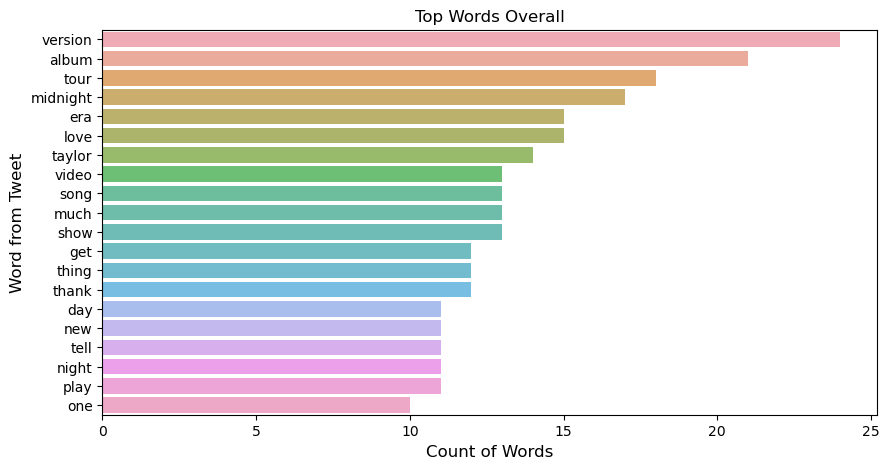

In [151]:
#Making the actual plot
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.barplot(x=df_sorted.iloc[1:21, 1], y=df_sorted.iloc[1:21, 0], alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


Question 7

In [152]:
import spacy
from spacy import displacy
import en_core_web_sm
EntityR = spacy.load('en_core_web_sm')

text_new = re.sub(r'[^A-Za-z0-9]+', ' ', sentences)
result = EntityR(text_new)
for word in result.ents:
    print(word.text, word.label_)

august DATE
November DATE
1989 DATE
Taylor s Version ORG
1989 DATE
October 27th DATE
5 CARDINAL
Vault ORG
1989 DATE
Taylor PERSON
https t ORG
Beth Garrabrant Midnights PERSON
13 CARDINAL
October 21 DATE
midnight TIME
Speak Now LOC
July 7 DATE
July 9th DATE
Speak Now WORK_OF_ART
between the ages of 18 DATE
six CARDINAL
Speak Now Taylor s Version WORK_OF_ART
July 7th DATE
Taylor PERSON
1989 DATE
klomIqGx38 https PERSON
between 18 and 20 CARDINAL
6 CARDINAL
Vault ORG
32 DATE
a million CARDINAL
Speak Now MY VERSION WORK_OF_ART
Beth Garrabrant PERSON
https PERSON
Don PERSON
https PERSON
1uBrXwviTS CARDINAL
august DATE
https PERSON
ZUAWDuv4jL https PERSON
November 19 DATE
first ORDINAL
30 CARDINAL
one CARDINAL
ten minutes TIME
long https PERSON
https PERSON
Tonight TIME
midnight TIME
8th ORDINAL
4ZVGy4l23b CARDINAL
Fearless Taylor s Version ORG
26 CARDINAL
6 CARDINAL
Love Story Taylor s Version WORK_OF_ART
tonight TIME
Speak Now WORK_OF_ART
Hayley Williams PERSON
Speak Now EVENT
32 DATE
July

The top three mentioned organizations are
1. Taylor's Version
2. Vault
3. USPS (United States Postal Service)

Question 8

In [153]:
!pip install textblob
from textblob import TextBlob


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['full_text'].apply(getPolarity)

print(df)

        conversation_id                created_at  favorite_count  \
2   1686225332691492864  2023-08-01T04:00:22.000Z         1583272   
1   1266392274549776387  2020-05-29T15:33:41.000Z         1912659   
3   1689521888903786496  2023-08-10T06:19:42.000Z         1294206   
4   1564100815069106176  2022-08-29T04:01:08.000Z         1081446   
5   1654697334012366849  2023-05-06T03:59:21.000Z         1108266   
..                  ...                       ...             ...   
91  1650570744588296210  2023-04-24T18:41:46.000Z          410044   
65  1330575546208686080  2020-11-22T18:15:05.000Z          425966   
74  1422692337499660290  2021-08-03T22:54:20.000Z          411575   
69  1261054225867472897  2020-05-14T22:02:11.000Z          403859   
89  1342918732486594560  2020-12-26T19:42:30.000Z          365480   

                                            full_text hashtags/0 hashtags/1  \
2                          get in the car it’s august        NaN        NaN   
1   After sto

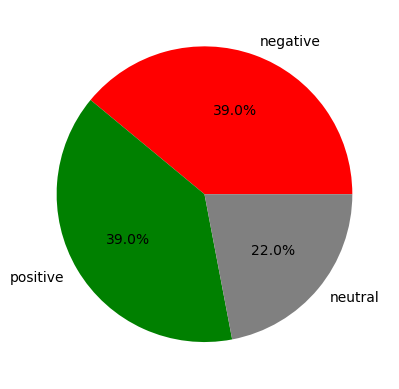

In [161]:
#Categorizing tweets into negative, neautral, and positive based on polarity 
df['sentiment'] = pd.cut(df['polarity'], bins=[-1, 0, 0.2, 1], labels=['negative', 'neutral', 'positive'])

#Calculating the percentage of each sentiment
sentiment_percentage = df['sentiment'].value_counts(normalize=True) * 100

# Plot a pie chart
labels = sentiment_percentage.index
sizes = sentiment_percentage.values

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()


THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor) DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work. Kade Levy